# Aims
* Those codes is made for check and discribes generated data

In [11]:
import openslide
import pandas as pd
import numpy as np
import glob,os,tqdm
import matplotlib.pyplot as plt

In [2]:
# load data
data_path= '/root/workspace/renqian/test/deeplab2/patchlist'
csv_list = glob.glob(os.path.join(data_path, '*.csv'))
tables=[]
# 此处从生成的patch的csv文件中导入，如果调用extractor，则是从返回值获取即可
qbar = tqdm.tqdm(csv_list)
for csv in qbar:
    qbar.set_description(f'loading csv: {csv}')
    tables.append(pd.read_csv(csv,index_col=0,header=0))
table=pd.concat(tables).reset_index(drop=True)

loading csv: /root/workspace/renqian/test/deeplab2/patchlist/tumor_001.csv: 100%|██████████| 1/1 [00:00<00:00, 44.05it/s]


In [3]:
table.head()

,slide_name,x,y,label
0,tumor_001,512,2048,0
1,tumor_001,512,2560,0
2,tumor_001,512,13312,0
3,tumor_001,512,13824,0
4,tumor_001,512,17408,0


In [4]:
table.describe()

,x,y,label
count,22519.000000,22519.000000,22519.000000
mean,42945.543230,106739.688263,0.004796
std,22530.931871,31999.230418,0.069088
min,512.000000,512.000000,0.000000
25%,24064.000000,84992.000000,0.000000
50%,39936.000000,110592.000000,0.000000
75%,61952.000000,131072.000000,0.000000
max,96768.000000,220160.000000,1.000000


# 检查坐标有效性

In [13]:
from wsi_ops import wsi
%matplotlib inline

In [6]:
pbar = tqdm.tqdm(glob.glob('/root/workspace/dataset/CAMELYON16/mask/*.tif'))
mask_dict={}
for gt_mask in pbar:
    _basename = os.path.basename(gt_mask).rstrip('.tif')
    pbar.set_description(f"Processing mask {gt_mask} - {_basename}" )
    mask_dict[_basename]=gt_mask

Processing mask /root/workspace/dataset/CAMELYON16/mask/tumor_040.tif - tumor_040: 100%|██████████| 111/111 [00:00<00:00, 2070.44it/s]


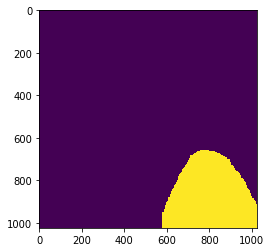

In [15]:
count=0
for i in table[table['label']==1].index:
    slide,x,y,label=table.loc[i]
    if wsi.read_mask(openslide.OpenSlide(mask_dict[slide]),x,y,0,1024,1024).sum() ==0:
        print(list(table.loc[i]))
    count +=1
    data=wsi.read_mask(openslide.OpenSlide(mask_dict[slide]),x,y,0,1024,1024)
    plt.imshow(data)
    if count==10:
        break

由上可知,坐标可以对应上

# 统计可知
label 中tumor点所占百分比为 0.004629

# 可视化结果

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'normal: 90\ntumor:21')

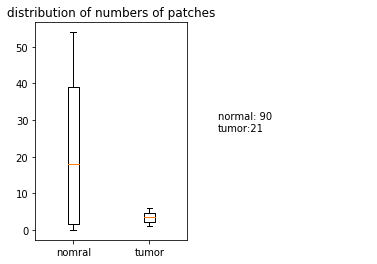

In [24]:
stats={}
stats[0]=np.array([0,2,34,54])
stats[1]=np.array([1,2,3,4,5,6])
figs,axs=plt.subplots(nrows=1, ncols=2)
axs[0].boxplot([stats[0],stats[1]],labels=['nomral','tumor'])
axs[0].set_title('distribution of numbers of patches')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].text(0,0.5,s=f'normal: {stats[0].sum()}\ntumor:{stats[1].sum()}')


Text(0, 0.5, 'normal: 90\ntumor:21')

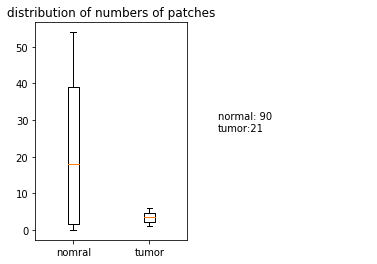

In [25]:
stats={}
stats[0]=np.array([0,2,34,54])
stats[1]=np.array([1,2,3,4,5,6])
figs,axs=plt.subplots(nrows=1, ncols=2)
axs[0].boxplot([stats[0],stats[1]],labels=['nomral','tumor'])
axs[0].set_title('distribution of numbers of patches')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].text(0,0.5,s=f'normal: {stats[0].sum()}\ntumor:{stats[1].sum()}')


In [10]:
# load data
data_path= '/root/workspace/renqian/test/deeplab2/patchlist'
csv_list = glob.glob(os.path.join(data_path, '*.csv'))
tables=[]
# 此处从生成的patch的csv文件中导入，如果调用extractor，则是从返回值获取即可
qbar = tqdm.tqdm(csv_list)
for csv in qbar:
    qbar.set_description(f'loading csv: {csv}')
    tables.append(pd.read_csv(csv,index_col=0,header=0))
table=pd.concat(tables).reset_index(drop=True)

0it [00:00, ?it/s]


ValueError: No objects to concatenate

In [17]:
table.head()

,slide_name,x,y,label
0,tumor_017,256.0,256.0,0
1,tumor_017,256.0,512.0,0
2,tumor_017,256.0,768.0,0
3,tumor_017,256.0,1024.0,0
4,tumor_017,256.0,1280.0,0


In [14]:
table.describe()

,x,y,label
count,953768.000000,953768.000000,953768.000000
mean,6095.415271,10969.731306,0.004629
std,4206.443487,7863.590689,0.067879
min,256.000000,256.000000,0.000000
25%,2816.000000,4352.000000,0.000000
50%,5632.000000,8704.000000,0.000000
75%,8192.000000,17408.000000,0.000000
max,27392.000000,27904.000000,1.000000


# 统计可知
label 中tumor点所占百分比为 0.004629

# 可视化结果

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'normal: 90\ntumor:21')

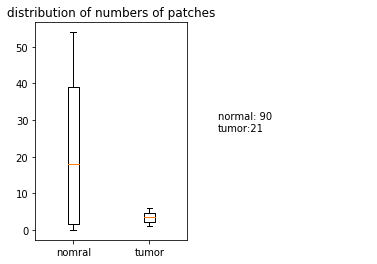

In [62]:
stats={}
stats[0]=np.array([0,2,34,54])
stats[1]=np.array([1,2,3,4,5,6])
figs,axs=plt.subplots(nrows=1, ncols=2)
axs[0].boxplot([stats[0],stats[1]],labels=['nomral','tumor'])
axs[0].set_title('distribution of numbers of patches')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].text(0,0.5,s=f'normal: {stats[0].sum()}\ntumor:{stats[1].sum()}')
